# Подключаем необходимые библиотеки:

In [48]:
import numpy as np
from numpy import loadtxt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Выбор расчитываемых параметров:

In [49]:
print('Выберите частицу, для которой будет проходить обучение:')
print('N2 - динитроген')
print('C - углерод')
particle = str(input())

print('Введите параметр для которого будет проходить обучение:')
print('Z - Полная стат.сумма')
print('Z_int - Внутренняя стат.сумма')
print('Z_tr - Поступательная стат.сумма')
print('E - Полная удельная энергия')
print('E_int - Внутренняя удельная энергия')
print('E_tr - Поступательная удельная энергия')
print('c_V - Удельная теплоёмкость')
input_parametr = str(input())

data = loadtxt(f'DataSets/{input_parametr}_{particle}.txt')
y = data

Выберите частицу, для которой будет проходить обучение:
N2 - динитроген
C - углерод
N2
Введите параметр для которого будет проходить обучение:
Z - Полная стат.сумма
Z_int - Внутренняя стат.сумма
Z_tr - Поступательная стат.сумма
E - Полная удельная энергия
E_int - Внутренняя удельная энергия
E_tr - Поступательная удельная энергия
c_V - Удельная теплоёмкость
E


# Данные для обучения модели выбираем путем перемешивания массива исходных данных и взятия у перемешанного массива сорока тысяч первых элементов:

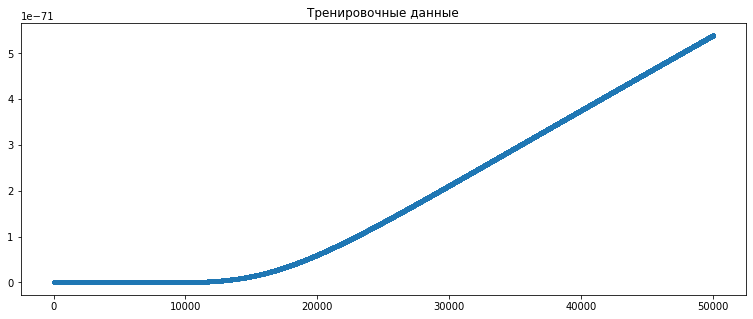

In [50]:
x = np.array(range(0, 50001))[:, None]
randomize_index = np.arange(len(x))
np.random.shuffle(randomize_index)
x_rand = x[randomize_index]
y_rand = y[randomize_index]

x_train = x_rand[:40000]
y_train = y_rand[:40000]

plt.plot(x_train, y_train, '.')
plt.title('Тренировочные данные');

# Тестовые данные - это оставшиеся десять тысяч случайных точек:

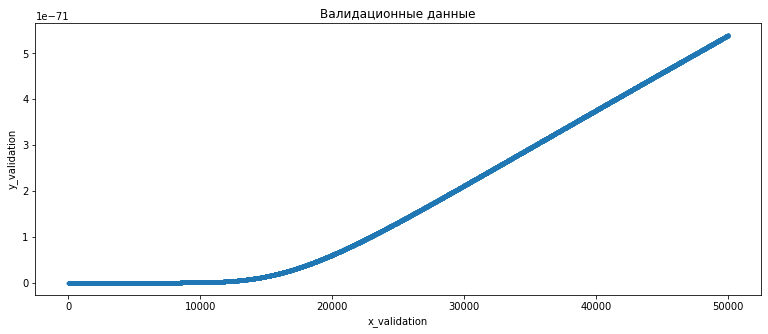

In [51]:
x_validation = x_rand[40000:]
y_validation = y_rand[40000:]

plt.plot(x_validation, y_validation, '.')
plt.title('Валидационные данные')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

# Модель, реализующая нелинейную регрессию на основе полиномов больших степеней:

In [52]:
model = LinearRegression()
poly = PolynomialFeatures(degree=7, include_bias=False)
x_train_new = poly.fit_transform(x_train)
model.fit(x_train_new, y_train)
x_validation_new = poly.fit_transform(x_validation)
y_pred = model.predict(x_validation_new)

# Сравнение предсказаний и точных значений в сотне случайных тестовых точках:

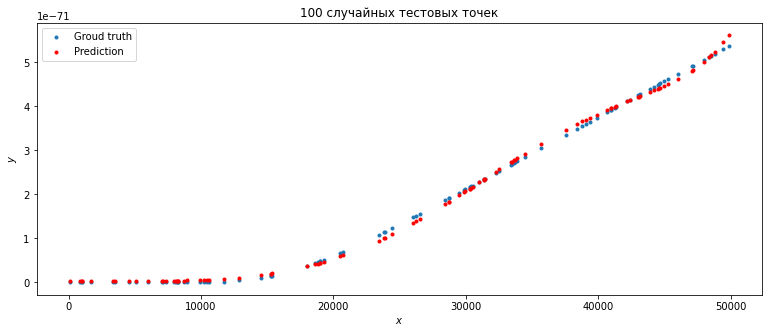

In [53]:
plt.plot(x_validation[:100], y_validation[:100], '.', label='Groud truth')
plt.plot(x_validation[:100], y_pred.data[:100], '.', c='r', label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('100 случайных тестовых точек');

# Сравнение предсказаний и точных значений во всех тестовых точках:

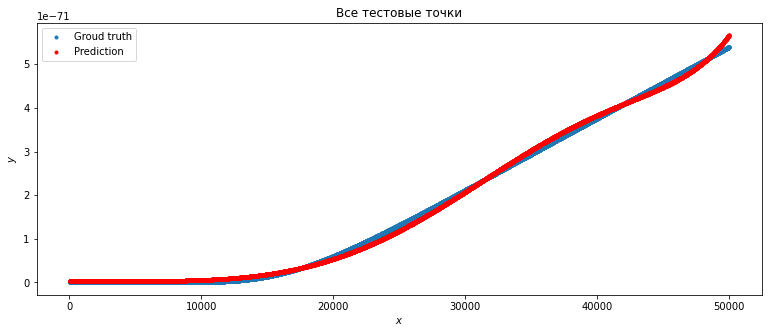

In [54]:
plt.plot(x_validation, y_validation, '.', label='Groud truth')
plt.plot(x_validation, y_pred.data, '.', c='r', label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Все тестовые точки');


# Функция потерь - средний квадрат ошибки (MSE):

In [55]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Функция потерь на последней итерации:

In [56]:
loss(y_pred, y_validation)

5.905918507178854e-145